In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

Secant Method

- 해의 근처에서 매끄러운 함수의 경우, 할선법으로 알려진 방법이 이분법보다 빠르게 해가 구해진다.
- 이 방법에서 함수는 주어진 영역에서 선형이라고 가정하고, 근의 다음 개선은 근사선이 축을 가로지르는 점으로 간주한다. 각 반복 후 가장 오래된 경계점은 루트의 최신 추정치를 위해 삭제됩니다.
- 시퀀트 방법은 충분히 연속적인 함수의 해 근처에서 더 빠르게 수렴한다. 그러나 해가 반드시 괄호로 묶인 채로 남아 있지는 않다는 단점이 있다.

<center><figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Secant_method.svg/300px-Secant_method.svg.png">
  <figcaption>From Wikipedia (https://en.wikipedia.org/wiki/Secant_method)</figcaption>
</figure></center>

일부 지역에서 축을 통과하는 연속적이고 부드러운 함수 $f(x)$를 생각해보자.
$[x_0, x_1]$ 구간이 주어지면 위 그림과 같이 $(x_0, f(x_0))$와 $(x_1, f(x_1))$ 지점을 통과하는 선을 구성할 수 있다.
*상수선*이라고 불리는 이 선의 방정식은 다음과 같다.


$$
y = \frac{f(x_1) - f(x_0}{x_1 - x_0}(x - x_1) + f(x_1)
$$

$y = 0$일 때, 해는 다음과 같다.
#### 단순히 x에 대하여 정리하면 됨.
$$
x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0}
$$


## 알고리즘

1. 초기값 $x_0$ 및 $x_1$로 시작하여, 시퀀트 선이 축과 교차하는 점을 구합니다.

    $$
    x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0}
    $$
    
2. 그런 다음 $x$의 새로운 값을 $x_2$로 사용하고 $x_0$와 $x_1$ 대신 $x_1$와 $x_2$를 사용하여 $x_3$, $x_4$ 등을 해결한다.

   $$
    \begin{aligned}
    x_3 &= x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)}, \\
    x_4 &= x_3 - f(x_3) \frac{x_3 - x_2}{f(x_3) - f(x_2)}, \\
    &\ \vdots \\
    x_n &= x_{n - 1} - f(x_{n - 1}) \frac{x_{n - 1} - x_{n - 2}}{f(x_{n - 1}) - f(x_{n - 2})}. \\
    \end{aligned}
    $$
3. 충분히 높은 정밀도($x_n$와 $x_{n-1}$ 사이의 충분히 작은 차이)에 도달하면 반복이 중지된다.

# Inplementaion : 구현

In [3]:
def secant_by(f, a, b, n):
    """Return the root calculated using the secant method.

    :param f:
        A function to solve.
    :param a:
        First initial location.
    :param b:
        Second initial location.
    :param n:
        The number of iterations : 반복되는 횟수
    """

    x0, x1 = a, b
    f0, f1 = f(x0), f(x1)
    iterations = n 
    x2 = None
    
    for i in range(iterations): #횟수를 지정할 때 까지, 계속해서 반복
        x2 = x1 - f1 * (x1 - x0) / float(f1 - f0)
        x0, x1 = x1, x2
        f0, f1 = f1, f(x1)
        
    return x2

이전과 마찬가지로 반복 횟수 대신 predicate를 취하는 secant_while라는 함수도 작성한다.

In [4]:
def secant_while(f, xinit, predicate):
    """Return the root calculated using the secant method.

    :param f:
        A function to solve.
    :param xinit:
        A pair of initial values for x.
    :param predicate:
        A callable that takes three arguments
            - i : the iteration count
            - xy : a pair of the midpoint and the function value in the current iteration
            - dx : the change of the x value
        and returns boolean:
            - If True, the search continues.
            - If False, the search terminates.
    """

    x0, x1 = map(float, xinit)
    f0, f1 = f(x0), f(x1)
    i, x2, f2 = 0, float("nan"), float("nan")
    
    def secant_root():
        nonlocal i, x2, f2
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        i += 1

        return i, (x2, f2), x2 - x1

    while predicate(*secant_root()):
        x0, x1 = x1, x2
        f0, f1 = f1, f2

        
    return x2

nonlocal의 이해

https://www.daleseo.com/python-global-nonlocal/

nonlocal 키워드도 global 키워드와 같이 동일한 이름의 새로운 변수가 생성되는 것을 방지하기 위해서 사용됩니다. 이 두 키워드의 차이점은 global 키워드는 일반 함수 내에서 전역(global/module) 변수를 대상으로 사용하는 반면에 nonlocal 키워드는 중첩 함수 내에서 비지역(nonlocal/closing) 변수를 대상으로 사용한다는 것입니다.

float('nan') 의 이해

In [5]:
import math
pp=float(3)
print(math.isnan(pp))

False


In [6]:
ppp = float('nan')
print(math.isnan(ppp))

True


map함수의 이해

In [7]:
# 실수로 저장된 모든 요소를 정수로 변환
a = [1.2, 2.5, 3.7, 4.6]
a = list(map(int, a))
a

[1, 2, 3, 4]

In [8]:
# 모든 요소에 100을 더해서 반환
a = [1, 2, 3, 4]

def plus100(n):
    return n + 100

list(map(plus100, a))


[101, 102, 103, 104]

# 연습

CubeRoot

Approximate $\sqrt[3]{2}$ by solving

$$
x^3 - 2 = 0
$$

In [9]:
cuberoot2_approx = secant_while(lambda x: x*x*x - 2, (1, 2),
                                lambda i, xy, dx: abs(dx) > 1e-10)
(cuberoot2_approx, abs(2**(1/3) - cuberoot2_approx))

(1.2599210498948732, 0.0)

### Supergolden Ratio : 슈퍼 황금 비율

Let's find an approximation of the [supergolden ratio](https://en.wikipedia.org/wiki/Supergolden_ratio),
which is the only real root of the polynomial(다항식)

$$
f(x) = x^3 - x^2 - 1
$$

The exact value of the supergolden ratio is given by

$$
\psi = \frac{1 + \sqrt[3]{\frac{29 + 3\sqrt{93}}{2}} + \sqrt[3]{\frac{29 - 3\sqrt{93}}{2}}}{3}
\approx 1.4655712318767682
$$

Let's plot the polynomial first:


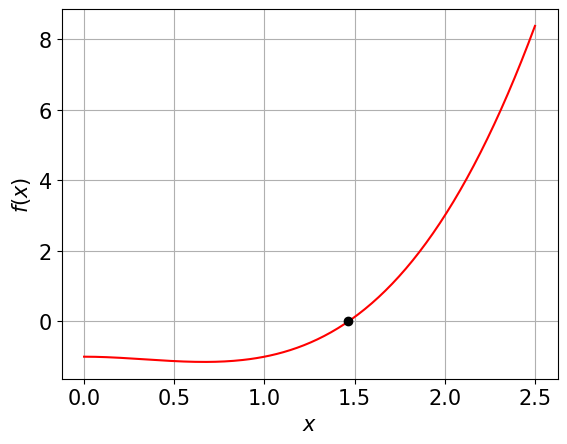

In [10]:
x = np.linspace(0, 2.5, 200)
y = x**3 - x**2 - 1

plt.figure()
plt.plot(x, y, '-r', 1.4655712318767682, 0, "ok")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

이 해를 구해보자

In [11]:
approx_psi = secant_by(lambda x: x ** 3 - x ** 2 - 1, 1, 2, 7) #이때 7은 반복 횟수
approx_psi

1.4655712318725789

정확한 해와 추정해를 비교해보자

In [12]:
supergolden = (1 + ((29 + 3 * 93 ** 0.5) / 2) ** (1 / 3) + ((29 - 3 * 93 ** 0.5) / 2) ** (1 / 3)) / 3
abs_err = abs(supergolden - approx_psi)
abs_err

4.189315561120566e-12

근사치는 7번 반복에서 10^-10의 정확도로 솔루션이 수렴된다.
이분법으로 했을 경우는 얼마나 많이 필요한지 확인해보자 -->즉 secant_shile이 근사치가 더 빨리 수렴된다는 걸 확인해보자

In [13]:
result_tuples = []

def predicate(i, xy, dx):
    result_tuples.append([i, *xy, dx])
    print("i = {:1d}, x = {:.12f}, y = {:+.12e}, dx = {:+.12e}"
          .format(i, *xy, dx))
    return abs(xy[1]) > 1e-10

secant_while(lambda x: x ** 3 - x ** 2 - 1, (1, 2), predicate)



i = 1, x = 1.250000000000, y = -6.093750000000e-01, dx = -7.500000000000e-01
i = 2, x = 1.376623376623, y = -2.862640816765e-01, dx = +1.266233766234e-01
i = 3, x = 1.488806910426, y = +8.346301015951e-02, dx = +1.121835338030e-01
i = 4, x = 1.463482351777, y = -7.322493320465e-03, dx = -2.532455864955e-02
i = 5, x = 1.465524956647, y = -1.625369994076e-04, dx = +2.042604870237e-03
i = 6, x = 1.465571325487, y = +3.288100440813e-07, dx = +4.636883965436e-05
i = 7, x = 1.465571231873, y = -1.471445187917e-11, dx = -9.361412489639e-08


1.4655712318725789

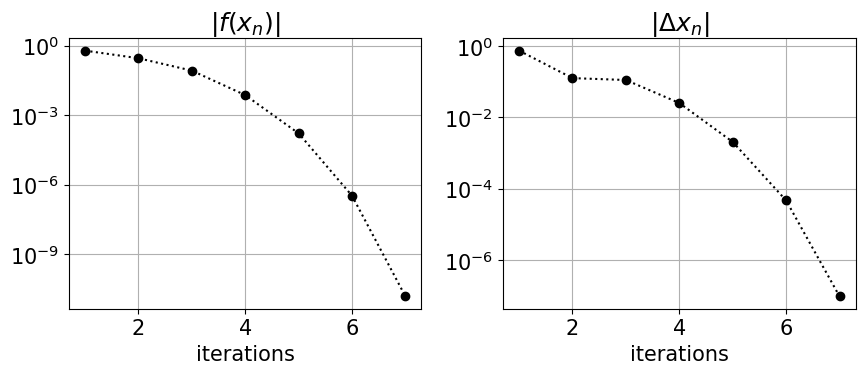

In [14]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.semilogy(
    [    ixydx[0]  for ixydx in result_tuples], 
    [abs(ixydx[2]) for ixydx in result_tuples], 
    "o:k")
plt.grid()
plt.xlabel("iterations")
plt.title("$|f(x_n)|$")

plt.subplot(1, 2, 2)
plt.semilogy(
    [    ixydx[0]  for ixydx in result_tuples], 
    [abs(ixydx[3]) for ixydx in result_tuples], 
    "o:k")
plt.grid()
plt.xlabel("iterations")
plt.title("$|\Delta x_n|$")

plt.tight_layout()
plt.show()

마지막으로, 솔루션을 초기 간격으로 괄호로 묶을 필요가 없습니다. 예를 들어, [2,2.5]를 초기 간격으로 제공할 수 있습니다.

In [15]:
secant_while(lambda x: x ** 3 - x ** 2 - 1, (2, 2.5),
             lambda i, xy, dx: abs(xy[1]) >= 1e-10)

1.465571231892479

## Whistler Dispersion(분산) Relation

플라즈마 파동은 상호 연결된 입자들과 장이고 이는 주기적으로 반복되는 방식으로 전파된다

플라즈마 파동 모드의 $\omega$ 의 주파수 와  $k$ 의 파수 는 dispersion relation(분산 관계)라고 불리는 특정한 관계를 만족시킨다.

$$
c^2 k^2 = \omega^2 - \frac{\omega_p^2}{1 - \omega_c/\omega}
$$

$c$는 빛의 속도이고, $\omega_p$ 는 전기 플라즈마 주파수[electron plasma frequency](https://en.wikipedia.org/wiki/Plasma_parameters) 
그리고 $\omega_c$ 는 전기 자이로 주파수[electron gyrofrequency](https://en.wikipedia.org/wiki/Plasma_parameters) 이다.



이것은 주파수 $\omega$ 의 함수로써 파수  $k$ 를 쉽게 찾을 수 있다.

$$
k(\omega) = \pm \frac{1}{c} \sqrt{\omega^2 - \frac{\omega_p^2}{1 - \omega_c/\omega}}
$$


Let's assume

- $c = 5$
- $\omega_p = 5$
- $\omega_c = 1$

and find how $k$ and $\omega$ is related:

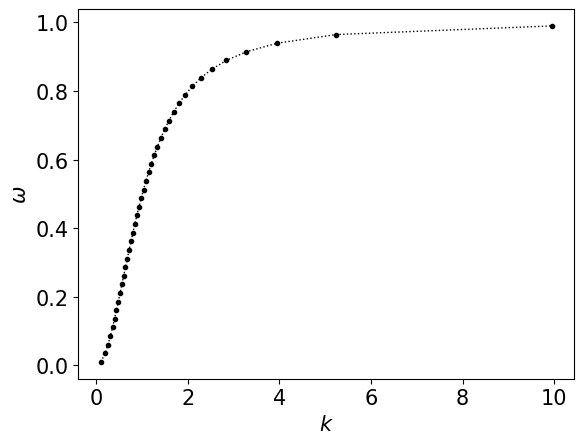

In [16]:
w = np.linspace(0.01, 0.99, 40) #40개로 쪼개고
k = 1/5 * np.sqrt(w**2 - 5**2/(1 - 1/w)) # 식에 대입해서 나오는 k 구하고

plt.figure()
plt.plot(k, w, ".:k", linewidth=1) #w값에 따른 k값의 변화를 그려보자
# ".:k" --> 점과 선으로 나타내진다. 그림이 더 깔끔하게 보여짐.
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.show()

    하지만 만대로 때때로 k값이 주어졌을 때 $\omega$ 유도해야 할 때가 있음. 그러나 k 함수에서 $\omega$구하는게 쉽지 안힉에, 우리는 root finding algorithm을 통해서 바람직한 k값을 구해낼 수 있다.
    


Let's define

$$
f_k(\omega) = 
c^2 k^2 - \omega^2 + \frac{\omega_p^2}{1 - \omega_c/\omega}
$$

For a given $k$, the frequency $\omega$ must satisfy $f_k(\omega) = 0$.
We will use the secant method to find solutions $\omega$ for a range of $k$ values.

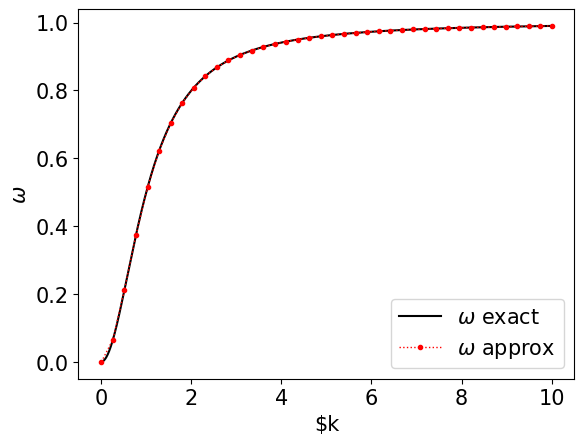

In [17]:
def dispersion_relation(k, w):
    c, wp, wc = 5, 5, 1
    return c**2 * k ** 2 - w**2 + wp**2 / (1 - wc/w)

#a 함수를 정의한다. (k가 주어진 a 에서 관계를 푸는 함수를 정의하자.)
def single_step(k, winit):
    max_w = max(winit, key = abs)
    return secant_while(lambda w: dispersion_relation(k, w), winit,
                       lambda i, xy, dw: abs(dw) > abs(1e-7* max_w))

ks = np.linspace(0.01, 10, 40)

ws = [ks[0], ks[1]]

for k in ks:
    ws.append(single_step(k, ws[-2:]))
    
ws = ws[2:]

w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))

plt.figure()
plt.plot(k_exact, w_exact, "-k", label= "$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth = 1, label = "$\\omega$ approx")
plt.xlabel("$k")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()